In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import keras

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

Using TensorFlow backend.


In [2]:
def mse(a,b):
    """function to compute the mean square error between two numpy arrays"""
    return np.square(a-b).mean()

def load_images(data_path):
    """Function to load images from NEU Dataset"""

    images=[] 
    labels=[] 

    for dirpath, dirnames, filenames in os.walk(data_path):
        for filename in filenames:
            defect=dirpath.split('\\')[-1] 
            if '.bmp' in filename:
                images.append(cv2.imread(os.path.join(dirpath,filename),0))
                labels.append(defect)

    images=np.asarray(images)
    labels=np.asarray(labels)

    return images, labels

In [3]:
data_path = r'C:\Users\mmatr\Desktop\Learning Data Science\IBM Machine Learning\Git\IBM-Machine-Learning-Course\Course_5_Deep_Learning\NEU Metal Surface Defects Data'
os.chdir(data_path)

data, labels = load_images(data_path)

In [4]:
#this is necessary to get the data into the form that to_categorical requires, namely an array of numeric labels
le = LabelEncoder()

labels_ohe = keras.utils.to_categorical(le.fit_transform(labels).reshape(-1,1), 6)

## Normalize Data

In [5]:
data=data/255

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.15)

In [7]:
X_train = X_train.reshape(len(X_train),200,200,1)
X_test = X_test.reshape(len(X_test),200,200,1)

# First Model

This model will be a contain a single convolution layer. And serve as the skeleton for subsequent models

In [8]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               19669248  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 19,670,950
Trainable params: 19,670,950
Non-trainable params: 0
__________________________________________

In [9]:
history_model1 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 14s 9ms/step - loss: 39.4688 - accuracy: 0.2235 - val_loss: 9.0801 - val_accuracy: 0.4111
Epoch 2/10
1530/1530 [==============================] - 19s 12ms/step - loss: 5.6626 - accuracy: 0.4294 - val_loss: 4.3330 - val_accuracy: 0.4333
Epoch 3/10
1530/1530 [==============================] - 18s 12ms/step - loss: 1.4158 - accuracy: 0.6739 - val_loss: 0.9326 - val_accuracy: 0.7481
Epoch 4/10
1530/1530 [==============================] - 18s 12ms/step - loss: 0.7560 - accuracy: 0.7993 - val_loss: 0.8466 - val_accuracy: 0.7778
Epoch 5/10
1530/1530 [==============================] - 18s 12ms/step - loss: 0.6212 - accuracy: 0.8248 - val_loss: 0.5789 - val_accuracy: 0.7704
Epoch 6/10
1530/1530 [==============================] - 19s 12ms/step - loss: 0.5261 - accuracy: 0.8542 - val_loss: 0.6328 - val_accuracy: 0.7815
Epoch 7/10
1530/1530 [==============================] - 19s 12ms/step - loss:

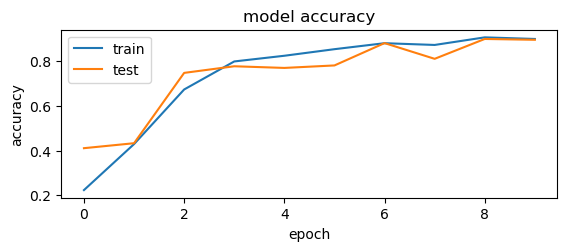

In [10]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model1.history['accuracy'])  
plt.plot(history_model1.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Adam Optimizer 

Else the same as above

In [23]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

ERROR! Session/line number was not unique in database. History logging moved to new session 672
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               19669248  
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 1542      
Total params: 19,670,95

In [24]:
history_model1a = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 14s 9ms/step - loss: 12.1119 - accuracy: 0.2804 - val_loss: 2.0130 - val_accuracy: 0.3481
Epoch 2/10
1530/1530 [==============================] - 18s 12ms/step - loss: 0.9205 - accuracy: 0.6614 - val_loss: 0.4949 - val_accuracy: 0.8222
Epoch 3/10
1530/1530 [==============================] - 22s 14ms/step - loss: 0.4931 - accuracy: 0.8157 - val_loss: 0.5996 - val_accuracy: 0.7296
Epoch 4/10
1530/1530 [==============================] - 21s 14ms/step - loss: 0.3924 - accuracy: 0.8686 - val_loss: 0.3564 - val_accuracy: 0.8630
Epoch 5/10
1530/1530 [==============================] - 21s 14ms/step - loss: 0.3432 - accuracy: 0.8765 - val_loss: 0.3678 - val_accuracy: 0.8296
Epoch 6/10
1530/1530 [==============================] - 21s 14ms/step - loss: 0.3425 - accuracy: 0.8778 - val_loss: 0.3432 - val_accuracy: 0.8778
Epoch 7/10
1530/1530 [==============================] - 21s 14ms/step - loss:

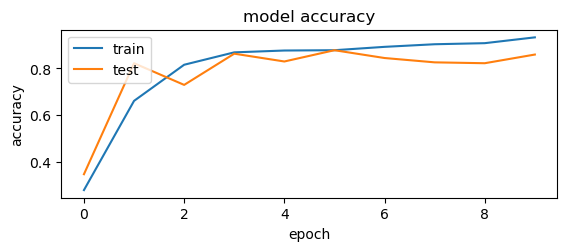

In [25]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model1a.history['accuracy'])  
plt.plot(history_model1a.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Model 2 

Attempt to reduce overfitting of model 1 - Smaller Dense layer

In [14]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               9834624   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
Total params: 9,835,558
Trainable params: 9,835,558
Non-trainable params: 0
____________________________________________

In [15]:
history_model2 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 15s 10ms/step - loss: 16.8942 - accuracy: 0.2706 - val_loss: 1.7403 - val_accuracy: 0.5185
Epoch 2/10
1530/1530 [==============================] - 15s 10ms/step - loss: 2.3919 - accuracy: 0.5137 - val_loss: 1.5898 - val_accuracy: 0.5519
Epoch 3/10
1530/1530 [==============================] - 15s 10ms/step - loss: 0.9447 - accuracy: 0.7229 - val_loss: 0.8106 - val_accuracy: 0.7037
Epoch 4/10
1530/1530 [==============================] - 15s 10ms/step - loss: 0.5662 - accuracy: 0.8085 - val_loss: 0.4611 - val_accuracy: 0.8444
Epoch 5/10
1530/1530 [==============================] - 15s 10ms/step - loss: 0.4586 - accuracy: 0.8490 - val_loss: 0.4291 - val_accuracy: 0.8741
Epoch 6/10
1530/1530 [==============================] - 15s 10ms/step - loss: 0.3995 - accuracy: 0.8712 - val_loss: 0.4512 - val_accuracy: 0.8259
Epoch 7/10
1530/1530 [==============================] - 15s 10ms/step - loss

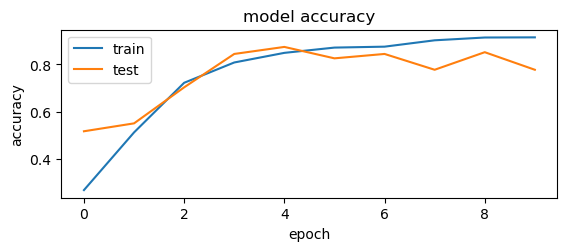

In [16]:

plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model2.history['accuracy'])  
plt.plot(history_model2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Filter size test

In [27]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               19669248  
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 1542      
Total params: 19,671,110
Trainable params: 19,671,110
Non-trainable params: 0
_________________________________________

In [28]:
history_model3 = model.fit(X_train,y_train,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 14s 9ms/step - loss: 15.6424 - accuracy: 0.3294 - val_loss: 1.8105 - val_accuracy: 0.4481
Epoch 2/10
1530/1530 [==============================] - 18s 12ms/step - loss: 1.2542 - accuracy: 0.6477 - val_loss: 0.9526 - val_accuracy: 0.7259
Epoch 3/10
1530/1530 [==============================] - 25s 16ms/step - loss: 0.8233 - accuracy: 0.7647 - val_loss: 0.5717 - val_accuracy: 0.8185
Epoch 4/10
1530/1530 [==============================] - 23s 15ms/step - loss: 0.6621 - accuracy: 0.8098 - val_loss: 0.4381 - val_accuracy: 0.8407
Epoch 5/10
1530/1530 [==============================] - 22s 14ms/step - loss: 0.5382 - accuracy: 0.8621 - val_loss: 0.4339 - val_accuracy: 0.8407
Epoch 6/10
1530/1530 [==============================] - 22s 14ms/step - loss: 0.3889 - accuracy: 0.8941 - val_loss: 0.6698 - val_accuracy: 0.7815
Epoch 7/10
1530/1530 [==============================] - 22s 14ms/step - loss:

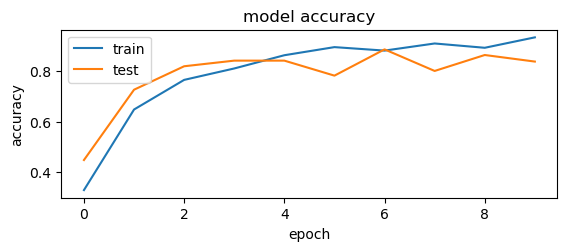

In [29]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model3.history['accuracy'])  
plt.plot(history_model3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Model with a second convolution layer

In [32]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               18874624  
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

In [33]:
history_model4 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 40s 26ms/step - loss: 4.0021 - accuracy: 0.2575 - val_loss: 1.4260 - val_accuracy: 0.3259
Epoch 2/10
1530/1530 [==============================] - 41s 27ms/step - loss: 1.4389 - accuracy: 0.4150 - val_loss: 1.4433 - val_accuracy: 0.4037
Epoch 3/10
1530/1530 [==============================] - 40s 26ms/step - loss: 1.2618 - accuracy: 0.5059 - val_loss: 1.2504 - val_accuracy: 0.5481
Epoch 4/10
1530/1530 [==============================] - 40s 26ms/step - loss: 1.0150 - accuracy: 0.6392 - val_loss: 1.0954 - val_accuracy: 0.6074
Epoch 5/10
1530/1530 [==============================] - 40s 26ms/step - loss: 0.8474 - accuracy: 0.6954 - val_loss: 0.9826 - val_accuracy: 0.6370
Epoch 6/10
1530/1530 [==============================] - 40s 26ms/step - loss: 0.6618 - accuracy: 0.7680 - val_loss: 0.8011 - val_accuracy: 0.7296
Epoch 7/10
1530/1530 [==============================] - 41s 27ms/step - loss:

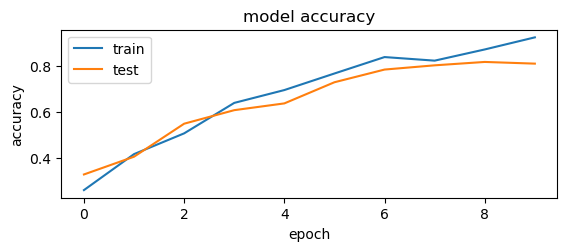

In [34]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model4.history['accuracy'])  
plt.plot(history_model4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

## Increasing the number of filters on the second convolution layer

In [23]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               37748992  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

In [24]:
history_model4_2 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=20,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/20
1530/1530 [==============================] - 58s 38ms/step - loss: 5.1928 - accuracy: 0.3484 - val_loss: 0.9037 - val_accuracy: 0.6704
Epoch 2/20
1530/1530 [==============================] - 57s 37ms/step - loss: 0.7734 - accuracy: 0.7216 - val_loss: 0.6160 - val_accuracy: 0.7889
Epoch 3/20
1530/1530 [==============================] - 54s 35ms/step - loss: 0.6320 - accuracy: 0.7601 - val_loss: 0.6214 - val_accuracy: 0.8074
Epoch 4/20
1530/1530 [==============================] - 54s 35ms/step - loss: 0.3739 - accuracy: 0.8771 - val_loss: 0.4331 - val_accuracy: 0.8481
Epoch 5/20
1530/1530 [==============================] - 55s 36ms/step - loss: 0.2774 - accuracy: 0.9111 - val_loss: 0.4204 - val_accuracy: 0.8481
Epoch 6/20
1530/1530 [==============================] - 54s 35ms/step - loss: 0.2379 - accuracy: 0.9170 - val_loss: 0.4826 - val_accuracy: 0.8222
Epoch 7/20
1530/1530 [==============================] - 54s 35ms/step - loss:

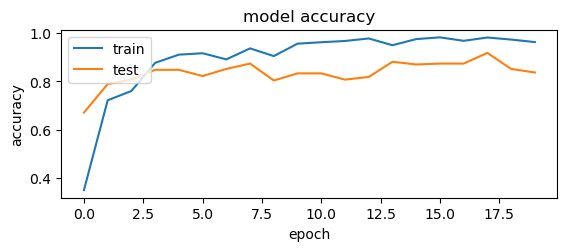

In [25]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model4_2.history['accuracy'])  
plt.plot(history_model4_2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolution Layers
Third layer the same depth as the second.

In [26]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 33856)            

In [27]:
history_model5b = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 51s 33ms/step - loss: 1.7443 - accuracy: 0.3516 - val_loss: 1.0213 - val_accuracy: 0.5370
Epoch 2/10
1530/1530 [==============================] - 51s 34ms/step - loss: 0.7970 - accuracy: 0.7085 - val_loss: 0.7981 - val_accuracy: 0.7148
Epoch 3/10
1530/1530 [==============================] - 51s 33ms/step - loss: 0.5707 - accuracy: 0.8131 - val_loss: 0.4806 - val_accuracy: 0.8519
Epoch 4/10
1530/1530 [==============================] - 51s 33ms/step - loss: 0.3497 - accuracy: 0.8824 - val_loss: 0.3908 - val_accuracy: 0.8963
Epoch 5/10
1530/1530 [==============================] - 51s 33ms/step - loss: 0.3064 - accuracy: 0.8980 - val_loss: 0.3151 - val_accuracy: 0.8963
Epoch 6/10
1530/1530 [==============================] - 51s 33ms/step - loss: 0.2397 - accuracy: 0.9203 - val_loss: 0.2942 - val_accuracy: 0.8852
Epoch 7/10
1530/1530 [==============================] - 51s 33ms/step - loss:

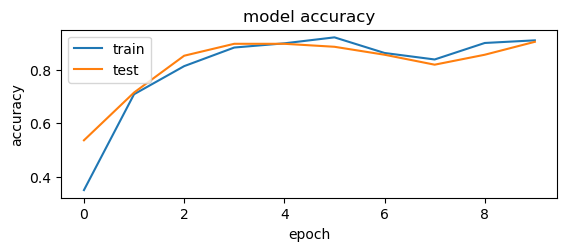

In [28]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5b.history['accuracy'])  
plt.plot(history_model5b.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolution Layers

geometrically increasing depths

In [29]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 67712)            

In [30]:
history_model5 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=20,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/20
1530/1530 [==============================] - 59s 39ms/step - loss: 1.5814 - accuracy: 0.4418 - val_loss: 0.9128 - val_accuracy: 0.7444
Epoch 2/20
1530/1530 [==============================] - 59s 39ms/step - loss: 0.5511 - accuracy: 0.8065 - val_loss: 0.8072 - val_accuracy: 0.6778
Epoch 3/20
1530/1530 [==============================] - 59s 39ms/step - loss: 0.3884 - accuracy: 0.8614 - val_loss: 0.4828 - val_accuracy: 0.8037
Epoch 4/20
1530/1530 [==============================] - 59s 38ms/step - loss: 0.4924 - accuracy: 0.8314 - val_loss: 0.4744 - val_accuracy: 0.8593
Epoch 5/20
1530/1530 [==============================] - 59s 39ms/step - loss: 0.2346 - accuracy: 0.9235 - val_loss: 0.2594 - val_accuracy: 0.9074
Epoch 6/20
1530/1530 [==============================] - 59s 38ms/step - loss: 0.2444 - accuracy: 0.9183 - val_loss: 0.3286 - val_accuracy: 0.9000
Epoch 7/20
1530/1530 [==============================] - 60s 39ms/step - loss:

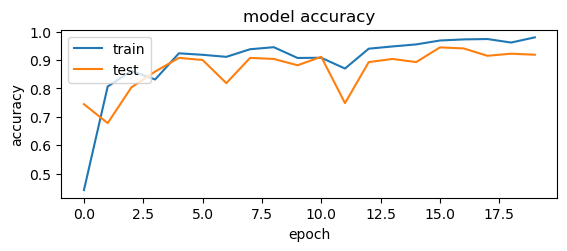

In [31]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5.history['accuracy'])  
plt.plot(history_model5.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolution Layers

geometrically increasing depths - smaller filter size

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)            

In [11]:
history_model5n = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
ERROR! Session/line number was not unique in database. History logging moved to new session 663
1530/1530 [==============================] - 54s 36ms/step - loss: 1.3085 - accuracy: 0.4634 - val_loss: 0.8726 - val_accuracy: 0.6074
Epoch 2/10
1530/1530 [==============================] - 65s 42ms/step - loss: 0.6413 - accuracy: 0.7634 - val_loss: 0.4140 - val_accuracy: 0.8556
Epoch 3/10
1530/1530 [==============================] - 63s 41ms/step - loss: 0.5731 - accuracy: 0.7948 - val_loss: 0.3620 - val_accuracy: 0.8778
Epoch 4/10
1530/1530 [==============================] - 62s 40ms/step - loss: 0.3238 - accuracy: 0.8869 - val_loss: 0.2959 - val_accuracy: 0.8778
Epoch 5/10
1530/1530 [==============================] - 62s 40ms/step - loss: 0.2861 - accuracy: 0.9013 - val_loss: 0.3545 - val_accuracy: 0.8704
Epoch 6/10
1530/1530 [==============================] - 63s 41ms/step - loss: 0.3093 - accuracy: 0.8922 - val_loss: 0.4768 - va

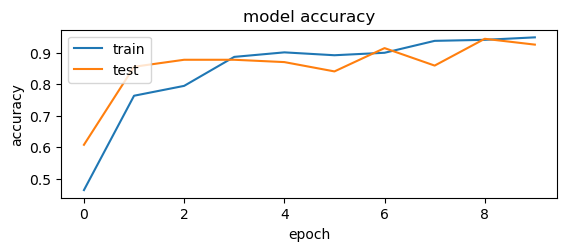

In [13]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5n.history['accuracy'])  
plt.plot(history_model5n.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolutions

rmsprop optimizer


In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 67712)            

In [10]:
history_model5rms = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 62s 40ms/step - loss: 3.4018 - accuracy: 0.2954 - val_loss: 1.5333 - val_accuracy: 0.3111
Epoch 2/10
1530/1530 [==============================] - 61s 40ms/step - loss: 1.5218 - accuracy: 0.3980 - val_loss: 1.1925 - val_accuracy: 0.5926
Epoch 3/10
1530/1530 [==============================] - 62s 40ms/step - loss: 1.3238 - accuracy: 0.5503 - val_loss: 1.4764 - val_accuracy: 0.3111
Epoch 4/10
1530/1530 [==============================] - 62s 40ms/step - loss: 1.0097 - accuracy: 0.6765 - val_loss: 0.6192 - val_accuracy: 0.7889
Epoch 5/10
1530/1530 [==============================] - 62s 40ms/step - loss: 0.9726 - accuracy: 0.7301 - val_loss: 0.8240 - val_accuracy: 0.7000
Epoch 6/10
1530/1530 [==============================] - 62s 40ms/step - loss: 0.6211 - accuracy: 0.7967 - val_loss: 0.8131 - val_accuracy: 0.7333
Epoch 7/10
1530/1530 [==============================] - 62s 40ms/step - loss:

In [11]:
history_model5rms2 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 61s 40ms/step - loss: 0.4628 - accuracy: 0.8830 - val_loss: 1.0805 - val_accuracy: 0.6852
Epoch 2/10
1530/1530 [==============================] - 61s 40ms/step - loss: 0.4143 - accuracy: 0.8882 - val_loss: 0.2786 - val_accuracy: 0.9037
Epoch 3/10
1530/1530 [==============================] - 61s 40ms/step - loss: 0.3284 - accuracy: 0.9078 - val_loss: 0.3509 - val_accuracy: 0.8889
Epoch 4/10
1530/1530 [==============================] - 61s 40ms/step - loss: 0.5105 - accuracy: 0.8902 - val_loss: 0.6653 - val_accuracy: 0.8148
Epoch 5/10
1530/1530 [==============================] - 62s 40ms/step - loss: 0.4668 - accuracy: 0.9144 - val_loss: 1.2276 - val_accuracy: 0.6259
Epoch 6/10
1530/1530 [==============================] - 56s 37ms/step - loss: 0.3904 - accuracy: 0.8987 - val_loss: 0.4005 - val_accuracy: 0.8963
Epoch 7/10
1530/1530 [==============================] - 58s 38ms/step - loss:

In [12]:
history_model5rms3 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 51s 33ms/step - loss: 0.3047 - accuracy: 0.9431 - val_loss: 0.3577 - val_accuracy: 0.9185
Epoch 2/10
1530/1530 [==============================] - 59s 39ms/step - loss: 0.3476 - accuracy: 0.9346 - val_loss: 1.0475 - val_accuracy: 0.7630
Epoch 3/10
1530/1530 [==============================] - 59s 38ms/step - loss: 0.2863 - accuracy: 0.9216 - val_loss: 0.6710 - val_accuracy: 0.8556
Epoch 4/10
1530/1530 [==============================] - 59s 39ms/step - loss: 0.1157 - accuracy: 0.9647 - val_loss: 0.6511 - val_accuracy: 0.8481
Epoch 5/10
1530/1530 [==============================] - 60s 39ms/step - loss: 0.3152 - accuracy: 0.9320 - val_loss: 0.6265 - val_accuracy: 0.8667
Epoch 6/10
1530/1530 [==============================] - 59s 38ms/step - loss: 0.3242 - accuracy: 0.9340 - val_loss: 0.5245 - val_accuracy: 0.8667
Epoch 7/10
1530/1530 [==============================] - 59s 39ms/step - loss:

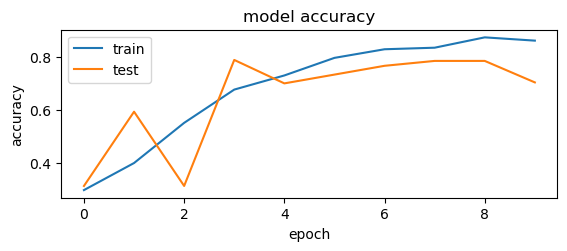

In [13]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5rms.history['accuracy'])  
plt.plot(history_model5rms.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

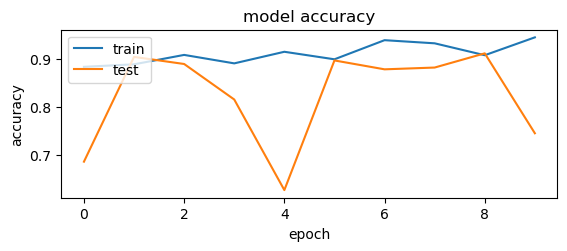

In [14]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5rms2.history['accuracy'])  
plt.plot(history_model5rms2.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

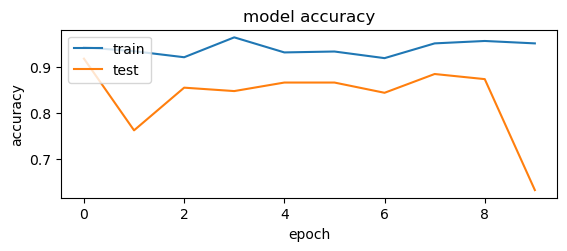

In [15]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5rms3.history['accuracy'])  
plt.plot(history_model5rms3.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()